In [49]:
import cv2
import os
from os import listdir
from os.path import join
from skimage.color import label2rgb, rgba2rgb
from skimage.io import imread, imshow
from skimage.transform import resize, rescale

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread', 'f', 'imshow', 'resize', 'square']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [55]:
path_rx = "/workspace/teeth_net/TEETH_DATASET/teeth/TEETH_DATASET/rx"
paths_mask = ["/workspace/teeth_net/TEETH_DATASET/teeth/teeth-category-4-001_100-luiz"]

l_path = lambda path_mask, path_rx : [ (join(path_mask,f), join(path_rx,f.split('.')[0]+".jpg"))  for f in sorted(listdir(path_mask)) if f != ".rlog"]


path_files_mask = l_path(path_mask, path_rx)

plt.figure(figsize=(20,20))

for path_mask in paths_mask:
    files = l_path(path_mask, path_rx)
    rows = len(files)
    cols = 2
    for i, f in enumerate(files):
        #plt.subplot(221)
        img, mask = imread(f[1])[:,:,0:3], imread(f[0])[:,:,0]
        print(f)
        cv2.imshow('image',rescale(label2rgb(mask, image=img), 0.5 ))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        #plt.imshow(label2rgb(mask, image=img))
        
#    img = imread(path_files)
    
#    image_label_overlay = label2rgb(label_image, image=img)

 

('/workspace/teeth_net/TEETH_DATASET/teeth/teeth-category-4-001_100-luiz/cate4-00001.bmp', '/workspace/teeth_net/TEETH_DATASET/teeth/TEETH_DATASET/rx/cate4-00001.jpg')


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


('/workspace/teeth_net/TEETH_DATASET/teeth/teeth-category-4-001_100-luiz/cate4-00069.bmp', '/workspace/teeth_net/TEETH_DATASET/teeth/TEETH_DATASET/rx/cate4-00069.jpg')
('/workspace/teeth_net/TEETH_DATASET/teeth/teeth-category-4-001_100-luiz/cate4-00070.bmp', '/workspace/teeth_net/TEETH_DATASET/teeth/TEETH_DATASET/rx/cate4-00070.jpg')
('/workspace/teeth_net/TEETH_DATASET/teeth/teeth-category-4-001_100-luiz/cate4-00071.bmp', '/workspace/teeth_net/TEETH_DATASET/teeth/TEETH_DATASET/rx/cate4-00071.jpg')
('/workspace/teeth_net/TEETH_DATASET/teeth/teeth-category-4-001_100-luiz/cate4-00072.bmp', '/workspace/teeth_net/TEETH_DATASET/teeth/TEETH_DATASET/rx/cate4-00072.jpg')
('/workspace/teeth_net/TEETH_DATASET/teeth/teeth-category-4-001_100-luiz/cate4-00073.bmp', '/workspace/teeth_net/TEETH_DATASET/teeth/TEETH_DATASET/rx/cate4-00073.jpg')
('/workspace/teeth_net/TEETH_DATASET/teeth/teeth-category-4-001_100-luiz/cate4-00074.bmp', '/workspace/teeth_net/TEETH_DATASET/teeth/TEETH_DATASET/rx/cate4-0007

(203, 284)


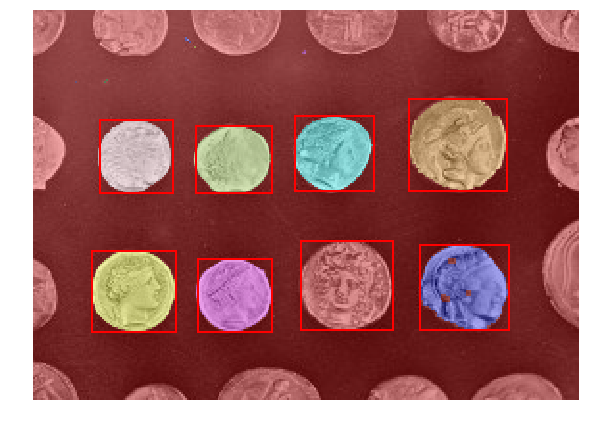

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
print(label_image.shape)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()